# Redes Neurais para Classificação de Tipos Espectrais de Supernovas

Este notebook é responsável pela análise dos espectros de supernovas na classificação em seus 4 tipos principais {Ia, Ib, Ic e II}.

## Introdução às Redes Neurais

De maneira geral redes neurais artificiais (RNAs) são modelos computacionais que se baseiam no sistema nervoso de um organismo (seres humanos e animais), tentando aproximar o processamento de informações de forma similar ao cérebro, este modelo é altamente difundido em problemas de reconhecimento de padrões.

O neurônio artificial, é definido pela figura 1 que ilustra o esquema de uma rede neural inicialmente proposto por McCulloch e Pitts em 1943. [1]

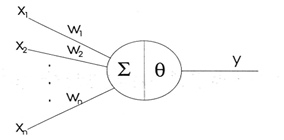
<p style="text-align: center;"> Figura 1 – Modelo MCP, esquema de McCulloch e Pitts. [1] </p>

Neste esquema, os axônios recebem sinais de entrada (x1,x2,x3,…,xn) que são multiplicados pelos valores de pesos (w1,w2,w3,…,wn) que por sua vez simulam uma espécie de sinapse, assim como ocorre no sistema biológico, as entradas são então processadas pelo núcleo por meio de funções matemáticas, denominadas funções de ativação, e propagadas para as saídas (y1,y2,y3,…,yn). Desta forma se pode definir uma rede neural em três componentes básicos:

• Neurônios de Entrada (camada de entrada): responsável por receber as principais características do que se quer classificar. 

• Funções de Ativação: representa o processamento das unidades de entrada e os pesos, para simular a sinapse que ocorre em neurônios biológicos.

• Neurônios de Saída (camada de saída): representa classificação final, definindo se determinada entrada corresponde, ou não, a uma das classes definidas previamente.
    
Este modelo de neurônio é o principal componente de redes neurais que utilizam o conjunto destes neurônios para gerar a classificação de padrões [1], em que os sinais de entrada são as características dos dados e os sinais de saída são correspondentes às classes a qual estes pertencem.

Apesar de obedecerem quase que integralmente ao modelo de neurônio MCP, as redes neurais artificiais possuem diversas variações, tais variações vêm da necessidade da aplicabilidade para problemas diversos e também da hibridização a paradigmas distintos para melhorar os resultados de classificação, este processo é muitas vezes realizado empiricamente.



## Modelo MLP e Treinamento

O modelo MLP é ideal para problemas de classificação, pois o algoritmo de treinamento desta rede neural é baseado em um método de descida gradiente para solução de problemas não lineares. O método de descida gradiente é um algoritmo baseado em gradiente que propõe que dada uma condição inicial, e seguindo uma direção de busca orientada pela direção contrária a direção do vetor gradiente da função objetivo ∇f(x), é possível atingir o ponto objetivo [2]. A figura 2 representa o modelo de rede neural MLP. 

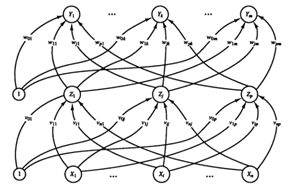 
<p style="text-align: center;">Figura 2 – Modelo MLP. [3]<\p>

A rede MLP é uma rede que conecta unidades de processamento simples, os neurônios, e tem a capacidade de aprendizado por meio de exemplos. Segundo [4], os elementos que compõem o neurônio são os seguintes:

• Peso sináptico: é um valor negativo ou positivo que representa a força de conexão entre um dado de entrada e o neurônio. O primeiro índice de um peso se refere ao neurônio e o segundo índice é o mesmo da entrada;

• Somador ou Junção Aditiva: é responsável por somar todas as entradas ponderadas por seus pesos sinápticos; 

• Bias: é um fator que aumenta ou diminui o valor da saída do somador; 

• Função de ativação: é a função que define a saída do neurônio.

A conexão entre mais de um neurônio molda a arquitetura de uma MLP. A ligação entre os neurônios pode ser feita através de múltiplas camadas, nas quais as entradas são multiplicadas pelos pesos, passam pelo somador e logo em seguida pela função de ativação. O aprendizado em redes MLP, por sua vez, pode ser do tipo supervisionado ou não-supervisionado. No aprendizado supervisionado, em oposição ao não-supervisionado, um agente externo apresenta à rede MLP alguns padrões de entrada e seus correspondentes padrões de saída. Portanto, é necessário ter um conhecimento prévio do comportamento que se deseja ou se espera da rede, como esclarece [5]. O aprendizado depende de um algoritmo que modifica os pesos de acordo com as saídas da rede em cada sessão de treinamento.



## Características de Entrada da Rede Neural: PCA

As caracteristicas utilizadas para o treinamento da rede MLP para classificação de Supernovas são correspondentes aos componentes principais (PCA) de cada espectro. Ao todo foram utilizados 20 componetes principais para cada supernova (10 componentes para os valores de comprimento de onda e 10 componentes para os valores de fluxo de radiação). 

A Análise de Componentes Principais (Principal Component Analysis (PCA)) é um procedimento matemático que utiliza uma transformação ortogonal (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de componentes principais. O número de componentes principais é menor ou igual ao número de variáveis originais. Esta transformação é definida de forma que o primeiro componente principal tem a maior variância possível (ou seja, é responsável pelo máximo de variabilidade nos dados), e cada componente seguinte, por sua vez, tem a máxima variância sob a restrição de ser ortogonal a (i.e., não correlacionado com) os componentes anteriores. Os componentes principais são garantidamente independentes apenas se os dados forem normalmente distribuídos (conjuntamente). O PCA é sensível à escala relativa das variáveis originais. Dependendo da área de aplicação, o PCA é também conhecido como transformada de Karhunen-Loève (KLT) discreta, transformada de Hotelling ou decomposição ortogonal própria (POD).

O PCA é matematicamente definido como uma transformação linear ortogonal que transforma os dados para um novo sistema de coordenadas de forma que a maior variância por qualquer projeção dos dados fica ao longo da primeira coordenada (o chamado primeiro componente), a segunda maior variância fica ao longo da segunda coordenada, e assim por diante.

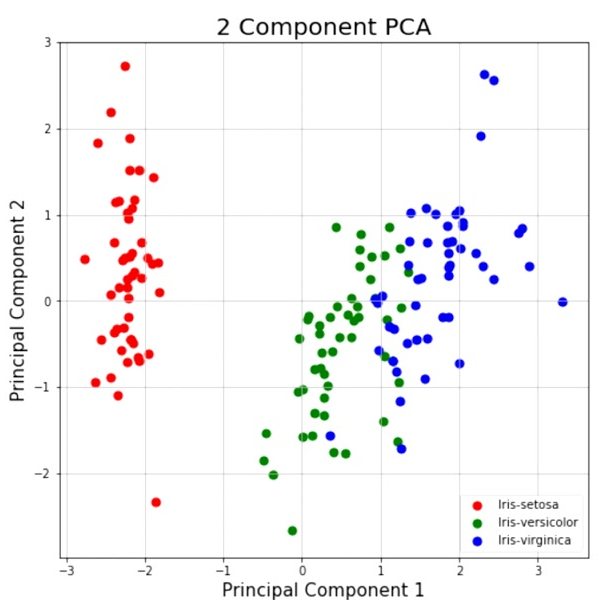


## Acesso aos Dataframes

In [6]:
'''
MLP - REDES NEURAIS EXPERIMENTOS PARA OS DADOS DE SUPERNOVAS
'''

'''
REDES MLP - PERCEPTRON MULTIPLAS CAMADAS
'''

'''
IMPORT
'''
import numpy as np
import matplotlib.pyplot as plt

'''
DATAFRAMES PANDAS
'''
import pandas as pd
from collections import OrderedDict

'''
DataSets
'''
from sklearn.model_selection import train_test_split


In [7]:
caminhoDataframe = 'C:\/Users\/Administrador\/Documents\/Doutorado\/3_Periodo\/DataMining\/Dados\/' 

def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

dataFrame_SN = abreDataFrame(caminhoDataframe, 'Data_Frame_All_SN_PCA_CINTIA.pkl')

In [8]:
dataFrame_SN.head(10)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_SNx_1,PCA_SNx_2,PCA_SNx_3,PCA_SNx_4,...,PCA_SNy_1,PCA_SNy_2,PCA_SNy_3,PCA_SNy_4,PCA_SNy_5,PCA_SNy_6,PCA_SNy_7,PCA_SNy_8,PCA_SNy_9,PCA_SNy_10
0,SN_Redshifted_sn1998V-19980319.flm,"[4000.0132876239077, 4008.0132876239077, 4016....","[0.7935526882817624, 0.8224037320882264, 0.836...",-1.890,Ia,Maximo,-594.683458,-272.432579,92.633707,-31.523102,...,-2.176162,-1.760225,0.276596,-0.659349,-0.173495,0.273358,-0.294197,-0.078656,0.159250,-0.259022
1,SN_Redshifted_sn1998V-19980320.flm,"[4000.0132876239077, 4008.0132876239077, 4016....","[0.8124123078712547, 0.7798971253889206, 0.789...",-1.890,Ia,Maximo,-594.683458,-272.432579,92.633707,-31.523102,...,-2.247760,-1.708269,0.269178,-0.663900,-0.133231,0.226484,-0.331931,-0.041784,0.137081,-0.194385
2,SN_Redshifted_sn1998V-19980321.flm,"[4000.921275257559, 4008.921275257559, 4016.92...","[0.8122789290326893, 0.808479578727523, 0.8249...",-0.956,Ia,Maximo,-605.885558,-269.361803,94.134161,-28.470269,...,-2.115104,-1.961904,0.144219,-0.725631,-0.068170,0.270111,-0.381240,-0.039556,0.168037,-0.182284
3,SN_Redshifted_sn1998dx-19980914.flm,"[4001.482267921209, 4009.482267921209, 4017.48...","[0.638564199171519, 0.7355039088902157, 0.7049...",-0.435,Ia,Maximo,-612.806683,-267.464549,95.061204,-26.584102,...,-3.137748,-0.708462,0.869184,-0.174411,-0.272720,0.058820,-0.087963,0.145272,-0.316077,0.002958
4,SN_Redshifted_sn1998dx-19980915.flm,"[4001.482267921209, 4009.482267921209, 4017.48...","[0.5772353719680303, 0.544093190047079, 0.6076...",-0.435,Ia,Maximo,-612.806683,-267.464549,95.061204,-26.584102,...,-3.076251,-0.048363,0.864850,-0.060144,-0.070724,0.078172,-0.186618,-0.007267,-0.060600,0.039389
5,SN_Redshifted_sn1998dx-19980917.flm,"[4001.482267921209, 4009.482267921209, 4017.48...","[0.5277520678956983, 0.5219502412669544, 0.705...",-0.435,Ia,Maximo,-612.806683,-267.464549,95.061204,-26.584102,...,-2.451785,0.204775,0.978062,0.202176,-0.039008,0.058648,-0.116368,0.025060,-0.161473,0.062822
6,SN_Redshifted_sn1998dx-19980918.flm,"[4001.482267921209, 4009.482267921209, 4017.48...","[0.6589231770879599, 0.7179617631532053, 0.739...",-1.890,Ia,Maximo,-612.806683,-267.464549,95.061204,-26.584102,...,-2.769117,-1.224027,0.563393,-0.480029,-0.054164,0.154813,-0.310274,0.018306,-0.266670,0.053412
7,SN_Redshifted_sn1998eg-19981024.flm,"[4003.3400598019134, 4011.3400598019134, 4019....","[0.7313347223332186, 0.7092240083638499, 0.707...",-1.890,Ia,Maximo,-635.726786,-261.181574,98.131214,-20.337841,...,-3.110927,-1.069634,0.439296,-0.490203,-0.041980,0.097090,-0.392199,-0.085209,-0.230177,-0.115439
8,SN_Redshifted_sn1999aa-19990223.flm,"[4003.3384448278066, 4011.3384448278066, 4019....","[0.8968872615980215, 0.906083787206773, 0.9344...",0.896,Ia,Maximo,-635.706862,-261.187036,98.128546,-20.343271,...,-3.429345,-1.163209,0.524957,-0.377722,-0.495858,0.131850,0.140086,0.120004,0.178065,-0.310689
9,SN_Redshifted_sn1999cc-19990516.flm,"[4002.716850235268, 4010.716850235268, 4018.71...","[0.6507061983644398, 0.7342926757936842, 0.753...",-1.891,Ia,Maximo,-628.038073,-263.289243,97.101358,-22.433194,...,-3.782843,-0.618337,0.639198,-0.590469,-0.026443,0.274912,-0.049145,0.086505,-0.231939,-0.012481


C:\Users\Administrador\Anaconda3\envs\machine_learn\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


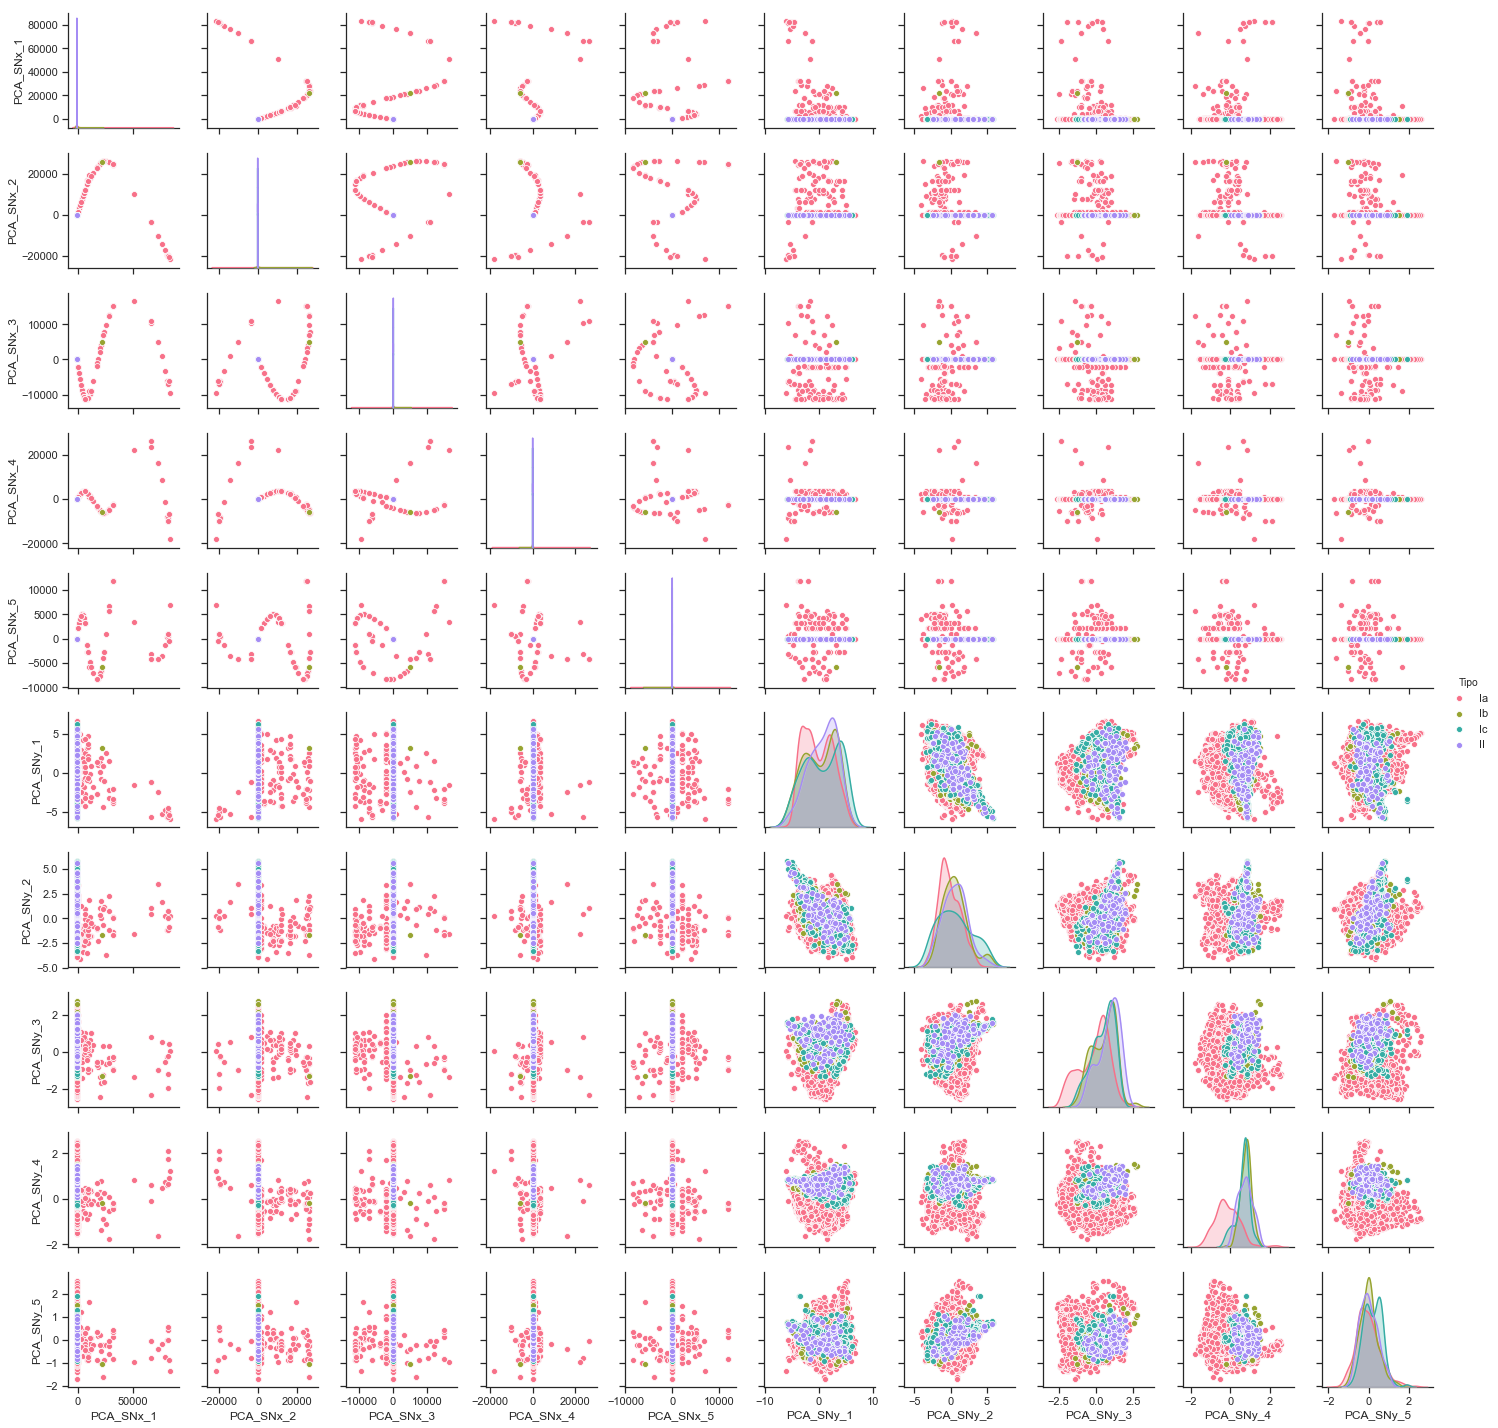

In [5]:
#Analise estatistica
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(dataFrame_SN, hue="Tipo",vars=['PCA_SNx_1','PCA_SNx_2','PCA_SNx_3','PCA_SNx_4','PCA_SNx_5','PCA_SNy_1','PCA_SNy_2','PCA_SNy_3','PCA_SNy_4','PCA_SNy_5'],size=2,palette="husl")


## Definição dos Conjuntos de Treinamento e Teste

In [9]:
#mudar os rotulos com nomes para numeros inteiros
#ROTULANDO COM VALORES
def machine_learning_tag(dataframe):
    
    nome_valor = []
    print(dataframe.loc[0,'Tipo'])
    for i in range(len(dataframe.index)):
        if(dataframe.loc[i,'Tipo'] == 'Ia'):
            valor = 1
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tipo'] == 'Ib'):
            valor = 2
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tipo'] == 'Ic'):
            valor = 3
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tipo'] == 'II'):
            valor = 4
            nome_valor.append(valor)
        else:
            nome_valor.append(0)
                
    dataframe['Tag_valor'] = nome_valor     
    
    return nome_valor


X = dataFrame_SN[['PCA_SNx_1','PCA_SNx_2','PCA_SNx_3','PCA_SNx_4','PCA_SNx_5','PCA_SNx_6','PCA_SNx_7','PCA_SNx_8','PCA_SNx_9','PCA_SNx_10','PCA_SNy_1','PCA_SNy_2','PCA_SNy_3','PCA_SNy_4','PCA_SNy_5','PCA_SNy_6','PCA_SNy_7','PCA_SNy_8','PCA_SNy_9','PCA_SNy_10']]

##Normalizando a amostra
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

#labels
y = machine_learning_tag(dataframe=dataFrame_SN)

'''
DIVIDE OS CONJUNTOS DE TREINAMENTO E DE TESTE
'''
X_train, X_test, y_train, y_test = train_test_split(
    X_norm,
    y,
    test_size=0.33,
    shuffle=True,
    random_state=33,
)


Ia


## Algoritmo MLP

In [10]:
'''
MLP IMPORTS
'''
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import validation_curve
import pickle

## Metodos para salvar os modelos com o treinamento da rede MLP

In [11]:
'''
GERA MÉTODO PARA SALVAR OS MODELOS E REALIZAR OS PLOTS
'''
#variações pedidas:
'''
Criando multiplos experimentos com os valores de:
    N_epocas
    N_neronios
    N_camadas
    N_momentum
    N_regularizacao = [0.001,0.01,0.1,0.5]
    learning_rate : {'constant', 'invscaling', 'adaptive'}
    regularização

    N_func = ['identity', 'logistic', 'tanh', 'relu']#4
    N_solver = ['lbfgs', 'sgd', 'adam']
'''

def gerarModelosMLP(nome_modelo,X_train,X_test,y_train,y_test,n_epocas,n_camadas,n_neuronios,n_momentum,n_regularizacao,n_ativacao):
    
    modelo = MLPClassifier(activation = n_ativacao,solver='sgd', alpha=n_regularizacao,learning_rate = 'adaptive',
                    hidden_layer_sizes=(n_neuronios,n_camadas), random_state=16,max_iter=n_epocas, momentum = n_momentum)
   
    modelo.fit(X_train, y_train)

    # SALVANDO O MODELO
    filename = nome_modelo+'.sav'
    pickle.dump(modelo, open(filename, 'wb'))


def carregaModelo(nomeModelo):
    carrega_modelo = pickle.load(open(nomeModelo+'.sav', 'rb'))
    return carrega_modelo


def plotError(modelo):
    plt.figure()
    plt.plot(modelo.loss_curve_, label="Erro",color = 'r')
    plt.xlabel("Epocas de Treinamento")
    plt.ylabel("Erro Quadratico Médio")

## Experimentos de configurações de cada rede neural testada

As configurações dos experimentos são ilustradas na tabela abaixo, elas são referentes as seguintes características:

•	Numero de camadas ocultas; Numero de neurônios nas camadas ocultas; Numero de épocas de treinamento; Valor para o termo momentum; Valor para o termo de regularização (alpha – L2);

•	As funções de ativação da rede foram as do tipo ‘Relu’.

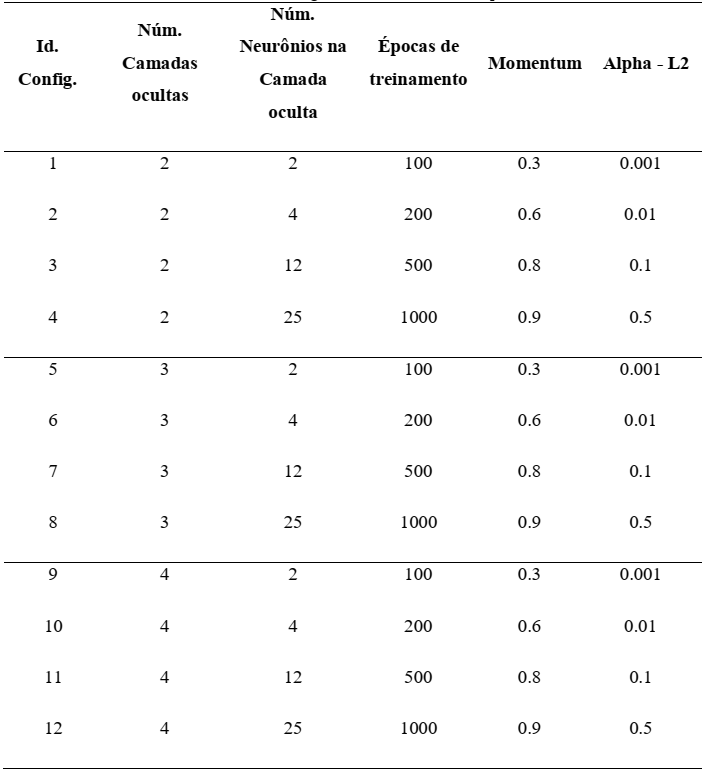



## Experimentos

In [12]:
#1 linha
gerarModelosMLP("Modelo_1_1",X_train,X_test,y_train,y_test,100,2,2,0.3,0.001,'relu')
gerarModelosMLP("Modelo_1_2",X_train,X_test,y_train,y_test,200,2,4,0.6,0.01,'relu')
gerarModelosMLP("Modelo_1_3",X_train,X_test,y_train,y_test,500,2,12,0.8,0.1,'relu')
gerarModelosMLP("Modelo_1_4",X_train,X_test,y_train,y_test,1000,2,25,0.9,0.5,'relu')

#2 linha
gerarModelosMLP("Modelo_2_1",X_train,X_test,y_train,y_test,100,3,2,0.3,0.001,'relu')
gerarModelosMLP("Modelo_2_2",X_train,X_test,y_train,y_test,200,3,4,0.6,0.01,'relu')
gerarModelosMLP("Modelo_2_3",X_train,X_test,y_train,y_test,500,3,12,0.8,0.1,'relu')
gerarModelosMLP("Modelo_2_4",X_train,X_test,y_train,y_test,1000,3,25,0.9,0.5,'relu')

#3 Linha
gerarModelosMLP("Modelo_3_1",X_train,X_test,y_train,y_test,100,4,2,0.3,0.001,'relu')
gerarModelosMLP("Modelo_3_2",X_train,X_test,y_train,y_test,200,4,4,0.6,0.01,'relu')
gerarModelosMLP("Modelo_3_3",X_train,X_test,y_train,y_test,500,4,12,0.8,0.1,'relu')
gerarModelosMLP("Modelo_3_4",X_train,X_test,y_train,y_test,1000,4,25,0.9,0.5,'relu')


C:\Users\Administrador\Anaconda3\envs\machine_learn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Administrador\Anaconda3\envs\machine_learn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Administrador\Anaconda3\envs\machine_learn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Administrador\Anaconda3\envs\machine_learn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

## Visualuizar Resultados do Treinamento - Curvas de Erro

Current size: [6.0, 4.0]


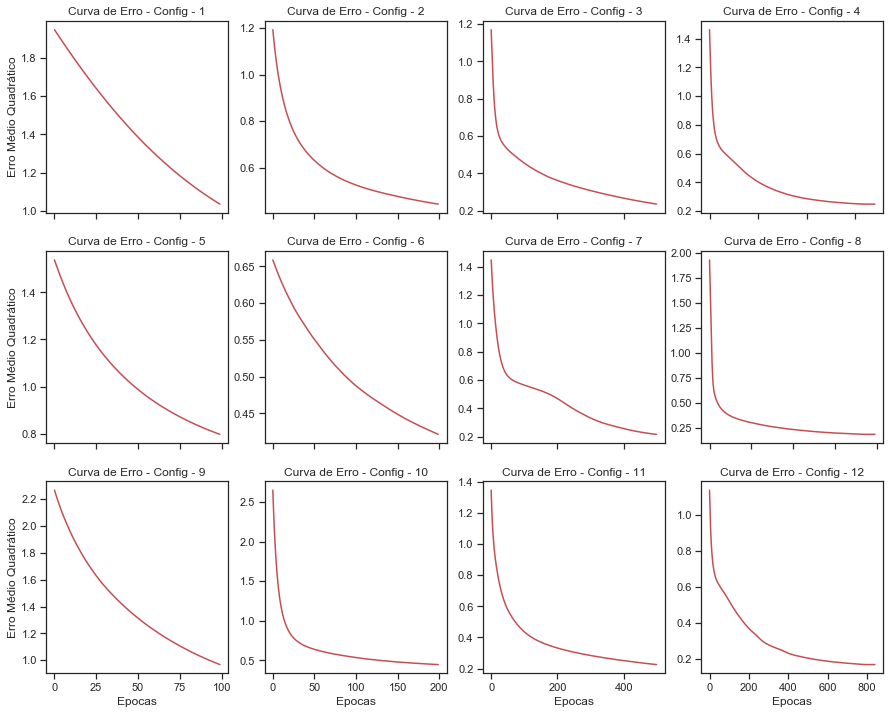

In [14]:
def carregaModelo(nomeModelo):
    carrega_modelo = pickle.load(open(nomeModelo+'.sav', 'rb'))
    return carrega_modelo


mode11 = carregaModelo("Modelo_1_1")
mode12 = carregaModelo("Modelo_1_2")
mode13 = carregaModelo("Modelo_1_3")
mode14 = carregaModelo("Modelo_1_4")

mode21 = carregaModelo("Modelo_2_1")
mode22 = carregaModelo("Modelo_2_2")
mode23 = carregaModelo("Modelo_2_3")
mode24 = carregaModelo("Modelo_2_4")

mode31 = carregaModelo("Modelo_3_1")
mode32 = carregaModelo("Modelo_3_2")
mode33 = carregaModelo("Modelo_3_3")
mode34 = carregaModelo("Modelo_3_4")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, axes = plt.subplots(nrows=3, ncols=4)
cor = 'r'

axes[0,0].plot(mode11.loss_curve_,cor)
axes[0,0].set_title('Curva de Erro'+' - Config - 1')

axes[0,1].plot(mode12.loss_curve_,cor)
axes[0,1].set_title('Curva de Erro'+' - Config - 2')

axes[0,2].plot(mode13.loss_curve_,cor)
axes[0,2].set_title('Curva de Erro'+' - Config - 3')

axes[0,3].plot(mode14.loss_curve_,cor)
axes[0,3].set_title('Curva de Erro'+' - Config - 4')

####################################################
axes[1,0].plot(mode21.loss_curve_,cor)
axes[1,0].set_title('Curva de Erro'+' - Config - 5')

axes[1,1].plot(mode22.loss_curve_,cor)
axes[1,1].set_title('Curva de Erro'+' - Config - 6')

axes[1,2].plot(mode23.loss_curve_,cor)
axes[1,2].set_title('Curva de Erro'+' - Config - 7')

axes[1,3].plot(mode24.loss_curve_,cor)
axes[1,3].set_title('Curva de Erro'+' - Config - 8')

####################################################
axes[2,0].plot(mode31.loss_curve_,cor)
axes[2,0].set_title('Curva de Erro'+' - Config - 9')

axes[2,1].plot(mode32.loss_curve_,cor)
axes[2,1].set_title('Curva de Erro'+' - Config - 10')

axes[2,2].plot(mode33.loss_curve_,cor)
axes[2,2].set_title('Curva de Erro'+' - Config - 11')

axes[2,3].plot(mode34.loss_curve_,cor)
axes[2,3].set_title('Curva de Erro'+' - Config - 12')

#####################################################

for i in range(0,3):
    axes[i,0].set_ylabel('Erro Médio Quadrático') # set y-axis label
    for j in range(0,4):
        axes[2,j].set_xlabel('Epocas') # set x-axis label
        # Turn off tick labels
        #axes[i,j].set_yticklabels([])
        #axes[i,j].set_xticklabels([])
  
for i in range(0,2):
    for j in range(0,4):
        # Turn off tick labels
        #axes[i,j].set_yticklabels([])
        axes[i,j].set_xticklabels([])        


## Comentários Sobre as curvas de erro

As curvas indicam que quanto maior o número de camadas e o número de épocas de treinamento o erro demonstra tendência a 0. A aplicação dos termos de momentum e regularização permitem que o decaimento do erro ocorra no decorrer das épocas sem estacionar em um mínimo local, também não é evidenciado em nenhum dos experimentos que o erro aumentou em alguma época. Foi observado que a convergência da rede é melhor para a configuração 12.

## Desempenho estatístico

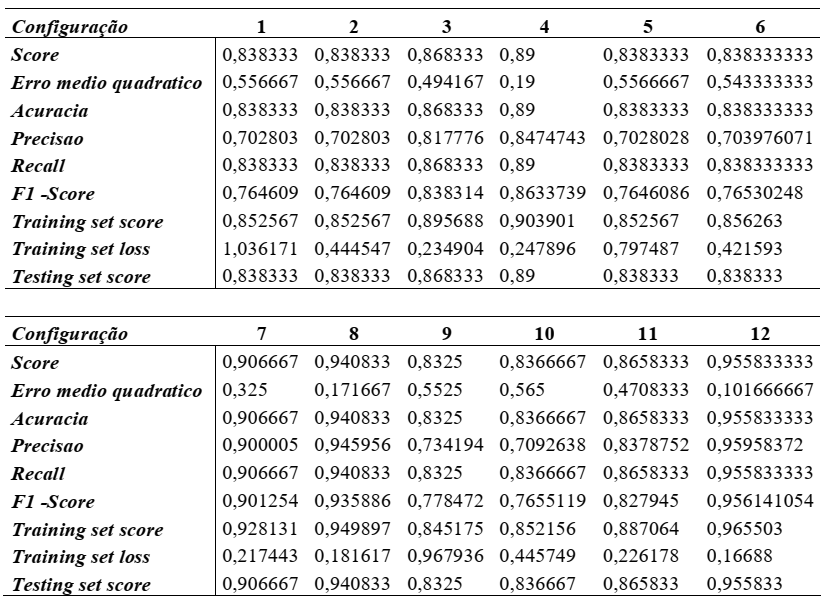

## Referências

[1] MCCULLOCH, Warren S.; PITTS, Walter. A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, v. 5, n. 4, p. 115-133, 1943.

[2] FLETCHER, R. Practical Methods of Optimization. 2. ed. University of Michigan: John Wiley and Sons, 1987. 1, 11.

[3] FAUSETT, Laurene. Fundamentals of neural networks: architectures, algorithms, and applications. Prentice-Hall, Inc., 1994.

[4] E. Ferneda. Redes neurais e sua aplicação em sistemas de recuperação de informação. Ci. Inf. Brasília, 35(1): 25–30, 2006.

[5] S. Haykin. Redes neurais: princípios e práticas. Bookman, Porto Alegre, 2001.